1.	a) Visualize continuous period signal x(t) = 2 + 3 * cos (500* pi *t) + 2 * cos (1000* pi *t) + 3 * sin (2000 *pi* t) in time-domain (axis: Amplitude and t) (5 points)
b) visualize its digital Fast Fourier transform (axis: Amplitude and f).  Given Sampling frequency as 1K HZ. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np

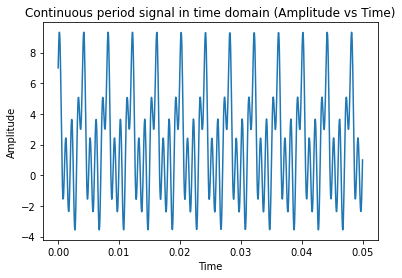

In [2]:
t = np.linspace(0, 0.05, 1000)
x = 2 + 3 * np.cos(500 * np.pi * t) + (2 * np.cos(1000 * np.pi * t)) + 3 * np.sin(2000 * np.pi * t)  
plt.plot(t, x);
plt.xlabel('Time')
plt.ylabel('Amplitude');
plt.title('Continuous period signal in time domain (Amplitude vs Time)')
plt.show()

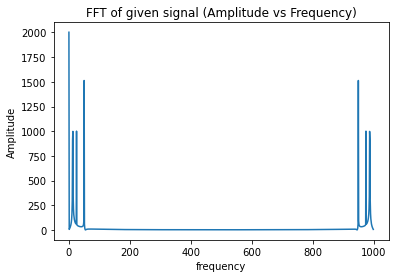

In [3]:
sample_freq = 1000
fourierTransform = np.fft.fft(x)
#fourierTransform = fourierTransform[range(int(len(x)/2))] # Exclude sampling frequency
count = len(x)
#values = np.arange(int(count/2))
values = np.arange(int(count))
timePeriod = count/sample_freq
freq = values/timePeriod
plt.plot(freq,abs(fourierTransform))
plt.ylabel('Amplitude')
plt.xlabel('frequency')
plt.title('FFT of given signal (Amplitude vs Frequency)')
# plt.xlim([0,1100])
plt.show()

2.	a) Visualize the discrete signal x(k) = 0 for k [0 499] & x(k) = 1 for k  [500 1000) s (sampling frequency as 1M HZ) in time-domain (Amplitude and t) (5 points);
b) Visualize its digital Fast Fourier transform (Amplitude and f), find its -3dB 
(called half-power) bandwidth frequencies (f_low, f_high) in frequency spectrum. (15 points)


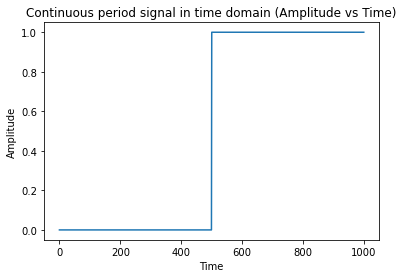

In [4]:
k = np.arange(1000)
x = np.zeros(1000)
for i in range(len(x)):
    if i>499:
        x[i] = 1
plt.plot(k,x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Continuous period signal in time domain (Amplitude vs Time)')
plt.show()

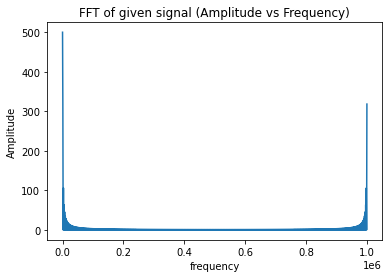

In [5]:
sample_freq = 1000000
fourierTransform = np.fft.fft(x)
# fourierTransform = fourierTransform[range(int(len(x)/2))] # Exclude sampling frequency
count = len(x)
# values = np.arange(int(count/2))
values = np.arange(int(count))
timePeriod = count/sample_freq
freq = values/timePeriod
plt.plot(freq,abs(fourierTransform))
plt.ylabel('Amplitude')
plt.xlabel('frequency')
plt.title('FFT of given signal (Amplitude vs Frequency)')
plt.show()




Text(0.5, 1.0, 'Pure signal and signal with noise added (Amplitude vs Time)')

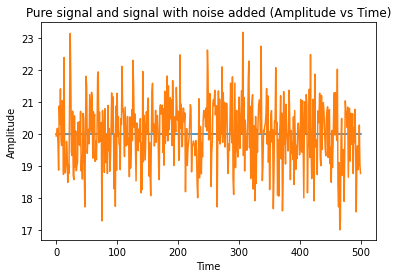

In [6]:
x = np.zeros(500)
k = np.arange(500)
meanValue = 0
var = 1
sd = np.sqrt(var)
for i in range(len(k)):
  x[i] = 20
n = np.random.normal(meanValue,sd,500)
x_dash = x + n
plt.plot(k,x,k,x_dash)
plt.xlabel('Time')
plt.ylabel('Amplitude');
plt.title('Pure signal and signal with noise added (Amplitude vs Time)')


Text(0.5, 1.0, 'Signal with noise y(k)')

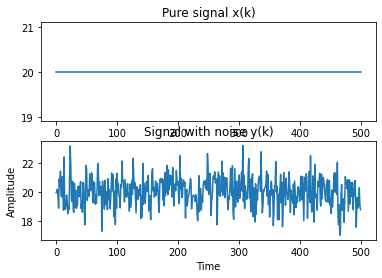

In [7]:
fig, axs = plt.subplots(2)
axs[0].plot(k, x)
axs[0].set_title('Pure signal x(k)')
plt.xlabel('Time')
plt.ylabel('Amplitude');
axs[1].plot(k, x_dash)
plt.xlabel('Time')
plt.ylabel('Amplitude');
axs[1].set_title('Signal with noise y(k)')

In [8]:
kernel_3 = [0.27901, 0.44198, 0.27901]
kernel_11 = [0.000003, 0.000229,0.005977,0.060598,0.24173,0.382925,0.24173,0.060598,0.005977,0.000229,0.000003]

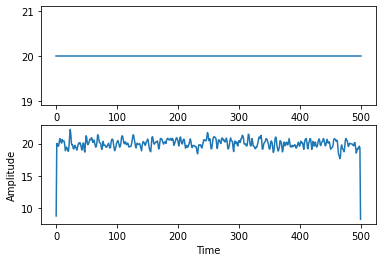

In [9]:
y = np.zeros(500)
for i in range(len(x)):
    if(i==0):
        y[0] = x_dash[0]*kernel_3[1]
    if(i==499):
        y[499] = x_dash[499] * kernel_3[1]
    if(i>0 and i<499):
        y[i] = x_dash[i-1]*kernel_3[0] + x_dash[i]*kernel_3[1] + x_dash[i+1]*kernel_3[2]

fig, axs = plt.subplots(2)
axs[0].plot(k, x)
axs[1].plot(k, y)
plt.xlabel('Time')
plt.ylabel('Amplitude');



Text(0, 0.5, 'Amplitude ')

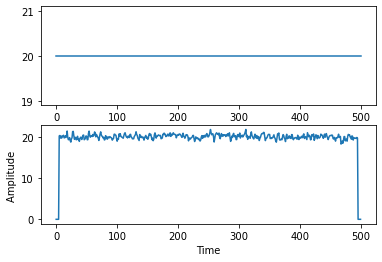

In [10]:
y = np.zeros(500)
size = 11
for i in range(len(x)):
    if(i>=0 and i<(int)(size/2)):
        y[i] = 0
    if(i<=499 and i>494):
        y[i] = 0
    if(i>=5 and i<=494):
        sum=0
        for j in range((int)(-size/2),(int)(size/2)+1):
            sum = sum + x_dash[i-j]*kernel_11[j]
        y[i] = sum
fig, axs = plt.subplots(2)
axs[0].plot(k, x)
axs[1].plot(k, y)
plt.xlabel('Time')
plt.ylabel('Amplitude ')